# Import Library and Tools

In [203]:
### Import Library
import os
import obspy
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
import keras.backend as K

### Tools
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


# Load Data

## Load SACA and BH File

### Load SACA

In [218]:
file_path = './Data/2022-05-16-mww58-southern-sumatra-indonesia'

In [219]:
list_file = os.listdir(file_path)
list_file_saca = [filename for filename in list_file if os.path.isfile(os.path.join(file_path, filename))]

total_file_sample = 9
print(f'total SACA file: {len(list_file_saca)}\n')
temp = '\n'.join(list_file_saca[:total_file_sample])
print(f'{total_file_sample} sample of SACA file:\n{temp}')

total SACA file: 337

9 sample of SACA file:
BK.CMB.00.BHE.Q.2022.136.190418.SAC
BK.CMB.00.BHN.Q.2022.136.190418.SAC
BK.CMB.00.BHZ.Q.2022.136.190418.SAC
CI.PASC.00.BHE.D.2022.136.190432.SAC
CI.PASC.00.BHN.D.2022.136.190432.SAC
CI.PASC.00.BHZ.D.2022.136.190432.SAC
CI.PASC.10.BHE.D.2022.136.190432.SAC
CI.PASC.10.BHN.D.2022.136.190432.SAC
CI.PASC.10.BHZ.D.2022.136.190432.SAC


## Example SAC data

In [256]:
test = obspy.read(os.path.join(file_path, list_file_saca[0]), format='SAC')
test

1 Trace(s) in Stream:
BK.CMB.00.BHE | 2022-05-16T19:04:18.019538Z - 2022-05-16T19:47:45.994538Z | 40.0 Hz, 104320 samples

<class 'numpy.ndarray'>
104320
[7174. 7321. 7287. ... 8619. 8376. 8601.]


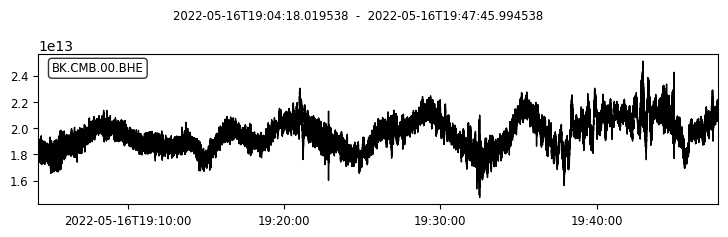

Figure(800x250)


In [257]:
print(type(test[0].data))
print(len(test[0].data))
print(test[0].data)
print(test.plot())

### Dataset Identity

In [224]:
df = pd.read_csv('./Data/data_identity.txt', sep='|')
print(f'total data in dataset: {len(df)}')
df.head()

total data in dataset: 69


,Station,Source,Net,Latitude,Longitude,Distance,Azimuth,Elevation,Station Name
0,BTDF,IRISDMC,MS,1.3617,103.7750,6.838478,15.006883,57.0,Bukit Timah Dairy Farm
1,COCO,IRISDMC,II,-12.1901,96.8349,8.622234,-143.996826,1.0,"West Island, Cocos (Keeling) Islands"
2,KAPI,IRISDMC,II,-5.0142,119.7517,17.673860,90.057363,300.0,"Kappang, Sulawesi, Indonesia"
3,MBWA,IRISDMC,IU,-21.1590,119.7313,23.422910,134.423008,190.0,"Marble Bar, Western Australia"
4,CHTO,IRISDMC,IU,18.8141,98.9443,24.247711,-7.075346,420.0,"Chiang Mai, Thailand"


In [290]:
df['Net'].unique()

array(['MS', 'II', 'IU', 'IC', 'GT', 'BK', 'IM', 'CI', 'CU'], dtype=object)

In [291]:
df[df['Station'] == 'PASC']

,Station,Source,Net,Latitude,Longitude,Distance,Azimuth,Elevation,Station Name
52,PASC,SCEDC,CI,34.17141,-118.18523,132.898337,46.792381,341.0,Art Center College of Design (GSN-affiliate)


In [285]:
# Format File Name :
# Network.Station.LocationID.Channel.___.Year.___.___.FileFormat
wavelength_dict

{'BK.CMB.00_Q.2022.136.190418': ['BHE', 'BHN', 'BHZ'],
 'CI.PASC.00_D.2022.136.190432': ['BHE', 'BHN', 'BHZ'],
 'CI.PASC.10_D.2022.136.190432': ['BHE', 'BHN', 'BHZ'],
 'CU.BBGH.00_M.2022.136.190821': ['BH1', 'BH2', 'BHZ'],
 'CU.GRTK.00_M.2022.136.190824': ['BH1', 'BH2', 'BHZ'],
 'CU.SDDR.00_M.2022.136.190826': ['BH1', 'BH2', 'BHZ'],
 'GT.VNDA.00_M.2022.136.190024': ['BHE', 'BHN', 'BHZ'],
 'IC.ENH.00_M.2022.136.185526': ['BH1', 'BH2', 'BHZ'],
 'IC.ENH.60_M.2022.136.185526': ['BH1', 'BH2', 'BHZ'],
 'IC.HIA.00_M.2022.136.185806': ['BH1', 'BH2', 'BHZ'],
 'IC.KMI.00_M.2022.136.185435': ['BH1', 'BH2', 'BHZ'],
 'IC.SSE.00_M.2022.136.185603': ['BH1', 'BH2', 'BHZ'],
 'IC.XAN.00_M.2022.136.185556': ['BH1', 'BH2', 'BHZ'],
 'II.ASCN.00_M.2022.136.190315': ['BH1', 'BH2', 'BHZ'],
 'II.ASCN.10_M.2022.136.190315': ['BH1', 'BH2', 'BHZ'],
 'II.BFO.00_M.2022.136.190151': ['BHE', 'BHN', 'BHZ'],
 'II.BFO.10_M.2022.136.190151': ['BHE', 'BHN', 'BHZ'],
 'II.BORG.00_M.2022.136.190245': ['BH1', 'BH2', 'BHZ'],
 

# Data Processing

In [282]:
# Format File Name :
# Network.Station.LocationID.Channel.___.Year.___.___.FileFormat
list_file_saca[-9:]

['IU.XMAS.10.BH1.M.2022.136.190210.SAC',
 'IU.XMAS.10.BH2.M.2022.136.190210.SAC',
 'IU.XMAS.10.BHZ.M.2022.136.190210.SAC',
 'IU.YAK.00.BH1.M.2022.136.185938.SAC',
 'IU.YAK.00.BH2.M.2022.136.185938.SAC',
 'IU.YAK.00.BHZ.M.2022.136.185938.SAC',
 'IU.YAK.10.BH1.M.2022.136.185938.SAC',
 'IU.YAK.10.BH2.M.2022.136.185938.SAC',
 'IU.YAK.10.BHZ.M.2022.136.185938.SAC']

In [278]:
wavelength_dict = {}

for index, name in enumerate(list_file_saca):       
    name_group = list(re.search(r"([\w\d\.]*).(BH[a-zA-Z0-9]+).([\w\d\.]*).SAC", name).groups())
    wavelength_name = '_'.join([name_group[0], name_group[2]])
    wavelength_channel = name_group[1]
    
    if wavelength_name not in wavelength_dict:
        wavelength_dict[wavelength_name] = [wavelength_channel]
    else:
        wavelength_dict[wavelength_name].append(wavelength_channel)
        
for key, item in list(wavelength_dict.items()):
    if len(item) != 3:
        del wavelength_dict[key]

wavelength_dict

{'BK.CMB.00_Q.2022.136.190418': ['BHE', 'BHN', 'BHZ'],
 'CI.PASC.00_D.2022.136.190432': ['BHE', 'BHN', 'BHZ'],
 'CI.PASC.10_D.2022.136.190432': ['BHE', 'BHN', 'BHZ'],
 'CU.BBGH.00_M.2022.136.190821': ['BH1', 'BH2', 'BHZ'],
 'CU.GRTK.00_M.2022.136.190824': ['BH1', 'BH2', 'BHZ'],
 'CU.SDDR.00_M.2022.136.190826': ['BH1', 'BH2', 'BHZ'],
 'GT.VNDA.00_M.2022.136.190024': ['BHE', 'BHN', 'BHZ'],
 'IC.ENH.00_M.2022.136.185526': ['BH1', 'BH2', 'BHZ'],
 'IC.ENH.60_M.2022.136.185526': ['BH1', 'BH2', 'BHZ'],
 'IC.HIA.00_M.2022.136.185806': ['BH1', 'BH2', 'BHZ'],
 'IC.KMI.00_M.2022.136.185435': ['BH1', 'BH2', 'BHZ'],
 'IC.SSE.00_M.2022.136.185603': ['BH1', 'BH2', 'BHZ'],
 'IC.XAN.00_M.2022.136.185556': ['BH1', 'BH2', 'BHZ'],
 'II.ASCN.00_M.2022.136.190315': ['BH1', 'BH2', 'BHZ'],
 'II.ASCN.10_M.2022.136.190315': ['BH1', 'BH2', 'BHZ'],
 'II.BFO.00_M.2022.136.190151': ['BHE', 'BHN', 'BHZ'],
 'II.BFO.10_M.2022.136.190151': ['BHE', 'BHN', 'BHZ'],
 'II.BORG.00_M.2022.136.190245': ['BH1', 'BH2', 'BHZ'],
 